<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/20220713-0311-2-4-cool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# file pre-processing
PRE_FILE_PATH = "/content/drive/MyDrive/data/20220713-0311-2-4-cool" # change data floder path here
FILE_PATH = PRE_FILE_PATH + "/pre-processed"

if not os.path.exists(FILE_PATH):
  os.mkdir(FILE_PATH)

for file_name in os.listdir(PRE_FILE_PATH):
  if file_name == "pre-processed":
    continue
  with open(PRE_FILE_PATH + "/" + file_name, 'r') as fp:
    lines = fp.readlines()
  with open(FILE_PATH + "/" + file_name, 'w') as fp:
    for line in lines:
      if line[0] != '!':
        fp.write(line)

In [6]:
df_list = []
temp_list = []

def temp_convertor(center_degree):
  return center_degree + 273

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  # print(file_name)
  # get temp from file name and convert to k
  temp = int(file_name[0:file_name.find('.')])  # change this line according to file name, python string processing
  converted_temp = temp_convertor(temp)
  temp_list.append(converted_temp)
  
  df_list.append(df)
  
def print_list(df_list, temp_list):
  for df, temp in zip(df_list, temp_list):
    print(temp)
    print(df.head(3))

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
# sort data base on temperature
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]
temp_list, df_list = sort_data(temp_list, df_list)

print_list(df_list, temp_list)

298
       0          1          2         3
0  0.018  49.179382  30.770598  0.001280
1  0.019  41.000500  27.396405  0.001351
2  0.020  30.612967  22.904399  0.001422
383
       0          1          2         3
0  0.018  46.341480  29.869596  0.001280
1  0.019  37.588047  26.231546  0.001351
2  0.020  23.724840  20.163589  0.001422
393
       0          1          2         3
0  0.018  41.586613  28.295747  0.001280
1  0.019  33.480904  24.756975  0.001351
2  0.020  31.183407  23.116814  0.001422
403
       0          1          2         3
0  0.018  30.931896  24.403250  0.001280
1  0.019  44.791233  28.634889  0.001351
2  0.020  59.727661  31.992925  0.001422
413
       0          1          2         3
0  0.018  34.650654  25.828555  0.001280
1  0.019  37.427662  26.175522  0.001351
2  0.020  41.320034  26.610101  0.001422
423
       0          1          2         3
0  0.018  15.307141  17.166883  0.001280
1  0.019  17.621202  17.960432  0.001351
2  0.020  23.049599  19.874576  0

# Fig 1

x: 4th col * 10 

y: 2nd

[298, 383, 393, 403, 413, 423, 433, 443, 453, 463, 473, 483, 488, 493, 498, 503, 508, 513, 518, 523, 528, 533, 538, 543, 548, 553]


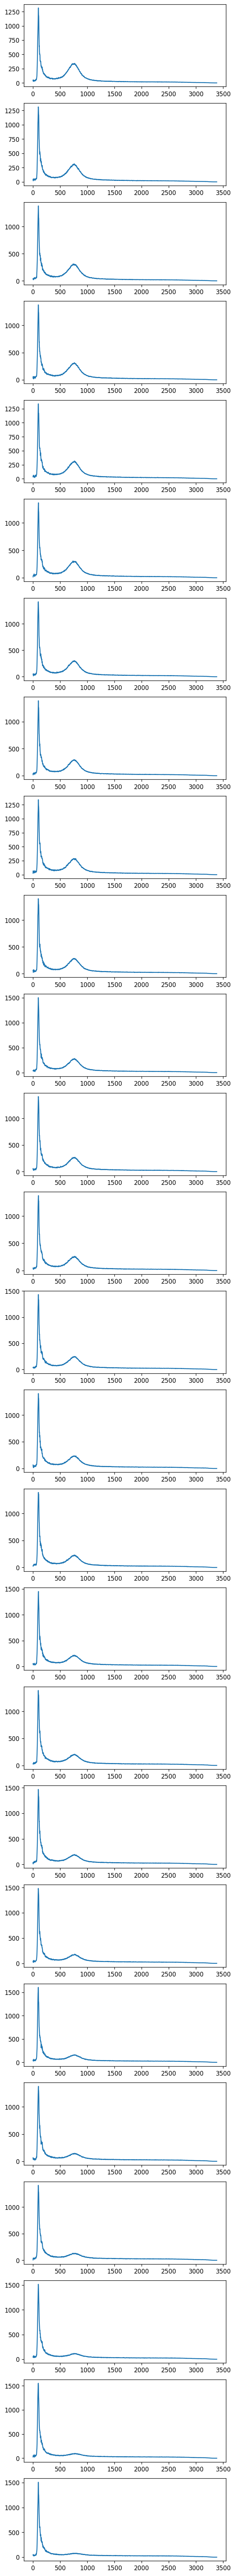

In [8]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)),dpi=120)

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
# plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index
print(temp_list)

# Fig 2
Find second peaks with scipy

In [11]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [10]:
# Option 2: region maximum

REGION_START = 500
REGION_END = 1000

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)
print(temp_list)

[341.225403, 316.52359, 313.399353, 312.836426, 314.905853, 304.494995, 303.688171, 296.203461, 288.122375, 282.779419, 282.29892, 268.27121, 260.308624, 248.793747, 234.231888, 229.477844, 218.243256, 206.671204, 193.865311, 182.965836, 161.134354, 146.324387, 132.090408, 118.12149, 100.155624, 80.289444]
[298, 383, 393, 403, 413, 423, 433, 443, 453, 463, 473, 483, 488, 493, 498, 503, 508, 513, 518, 523, 528, 533, 538, 543, 548, 553]


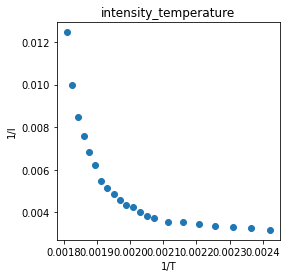

In [11]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
x,y = sort_data(x, y)
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(4, 4))
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')

# print(temp_list, peaks_value)
plt.scatter(x[0:22], y[:22], linewidth = 1.0, linestyle = '-')
plt.show()

# Fig 3

In [12]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

# x_fit = x[2:5]
# y_fit = y[2:5]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
# res = st.linregress(x_fit, y_fit)
# plt.plot(x_fit, y_fit, 'o', label='original data')
# plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
# print(1/(res.intercept/((-1)*res.slope))-273)
# print(res.intercept)
# plt.legend()
# plt.figure(figsize=(4, 4),dpi=120)
# plt.scatter(x[:18],y[:18])
# plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

# Fig 5

Gaussian fitting of second peak in Fig 1

0.542061498543568
0.5435334229695098
0.5440193652714246
0.5446764167710229
0.545178137990788
0.5458982129625826
0.546572970058609
0.5465455210455786
0.5471706288248906
0.5479539818610364
0.5479673285113305
0.5486449040654525
0.5490894965140496
0.5497004776772029
0.5498578302896054
0.5504189700989512
0.5512326408267326
0.5518134608295452
0.5526369051521073
0.5532920140357558
0.5543656355299154
0.5553409264417757
0.5562901536074307
0.5572440620167569
0.5585636540512391
0.5600324939163108


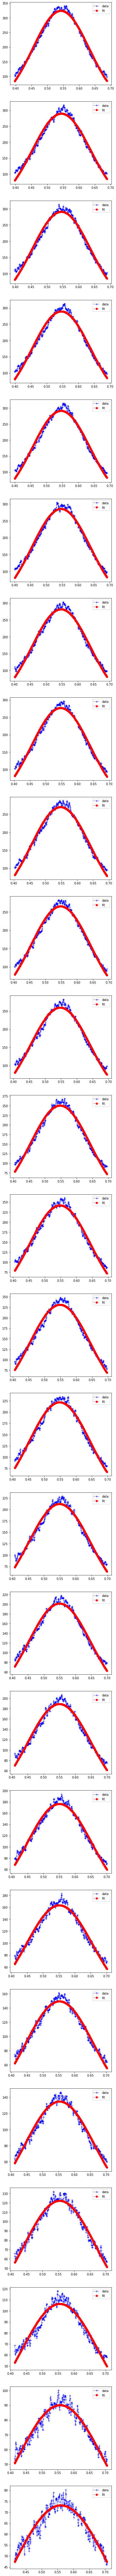

In [37]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

def gaus(x, a, x0, sigma):
  return a * (1/(sigma * (np.sqrt(2*np.pi)))) *np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  START_REGION = 540+i*1
  END_REGION  = 950+i*1
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]
  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  print(mean)
  plt.legend()

FWHM:0.20853
FWHM:0.21633
FWHM:0.21610
FWHM:0.21687
FWHM:0.21440
FWHM:0.21673
FWHM:0.21693
FWHM:0.21823
FWHM:0.21957
FWHM:0.21896
FWHM:0.22073
FWHM:0.22086
FWHM:0.22457
FWHM:0.22504
FWHM:0.22705
FWHM:0.22828
FWHM:0.23090
FWHM:0.23547
FWHM:0.24006
FWHM:0.24423
FWHM:0.25081
FWHM:0.25739
FWHM:0.26710
FWHM:0.28424
FWHM:0.31582
FWHM:0.37039


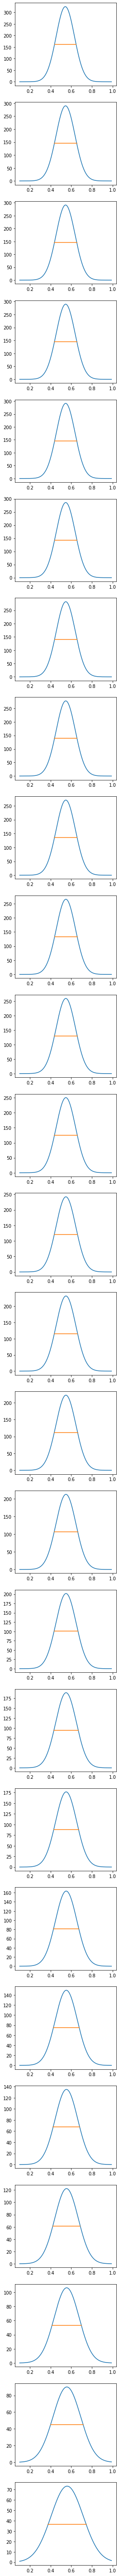

In [39]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  
  if len(zero_crossings_i) != 2:
    raise Exception("You should check START_GEN and END_GEN")
  
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0.1   # region start and end
END_GEN = 0.99
hw_result = []    # store result

plt.figure(figsize=(4, 4 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.5f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

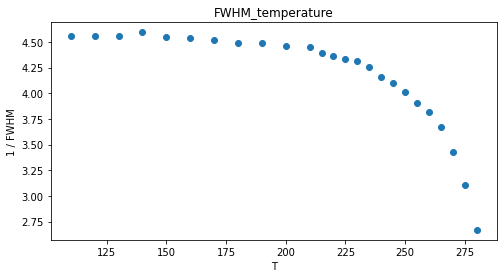

            0
4.562008  120
4.554120  130
4.594163  140
4.544656  150
4.540174  160
4.517424  170
4.493190  180
4.491975  190
4.464251  200
4.450430  210
4.387182  215
4.366979  220
4.335336  225
4.314541  230
4.259708  235
4.161772  240
4.095338  245
4.012562  250
3.907919  255
3.812837  260
3.666842  265
3.426268  270
3.104447  275
2.668363  280


In [30]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[1:], y[1:], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[2:],y[2:])
print(df)

# Fig 7

x = 230.43845334953824, y = 4.418191112723966


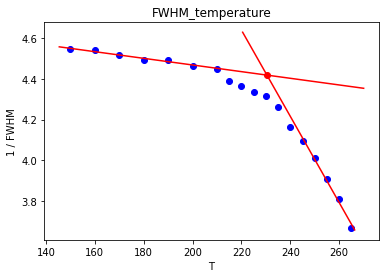

In [36]:
import numpy as np
import sympy

x_fit1 = x[5:11]
y_fit1 = y[5:11]

res1 = st.linregress(x_fit1, y_fit1)
# plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.35 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[18:23]
y_fit2 = y[18:23]
res2 = st.linregress(x_fit2, y_fit2)
# plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.90 * x_fit2[0], 1.005 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')
# plt.figure(figsize=(6, 4),dpi=200)

# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
plt.scatter(x[5:23], y[5:23], color='b', linewidth = 1.0, linestyle = '-')
print(f'x = {inter_x}, y = {inter_y}')

In [43]:
import numpy as np
# define a fitting function
# including 自变量x, 振幅amplitude, 对称中心center, 标准差sigma 
# 该表达式是一个带振幅值amplitude的高斯函数表达式
def _1gaussian(x, amp1, cen1, sigma1):
  return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))
# scipy function用来进行曲线的拟合。原理如下：
# 残差平方和RSS（the sum of the squared residuals of f(xdata, *popt) - ydata）最小
# 标准差（perr = np.sqrt(np.diag(pcov))）
